## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4           Y
0  87.545136  1358.652167  0.242578   1.458207  341.046603
1  81.268344  1391.825726  0.208675  10.036503  301.711169
2  62.662561   181.099035  0.997712   3.541044  191.221844
3  32.199420   572.768119  0.759911   7.534171  436.631683
4  73.532085   418.756615  0.338168   1.500759  159.480845


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0071250	total: 57.4ms	remaining: 57.3s
1:	learn: 0.9948686	total: 57.8ms	remaining: 28.8s
2:	learn: 0.9842047	total: 58.3ms	remaining: 19.4s
3:	learn: 0.9708076	total: 58.7ms	remaining: 14.6s
4:	learn: 0.9570807	total: 59.3ms	remaining: 11.8s
5:	learn: 0.9443855	total: 59.8ms	remaining: 9.9s
6:	learn: 0.9314762	total: 60.3ms	remaining: 8.55s
7:	learn: 0.9171764	total: 60.8ms	remaining: 7.54s
8:	learn: 0.9037600	total: 61.3ms	remaining: 6.74s
9:	learn: 0.8900437	total: 61.8ms	remaining: 6.12s
10:	learn: 0.8803018	total: 62.3ms	remaining: 5.6s
11:	learn: 0.8663578	total: 62.8ms	remaining: 5.17s
12:	learn: 0.8547888	total: 63.3ms	remaining: 4.8s
13:	learn: 0.8428303	total: 63.8ms	remaining: 4.49s
14:	learn: 0.8310958	total: 64.2ms	remaining: 4.22s
15:	learn: 0.8213609	total: 64.6ms	remaining: 3.97s
16:	learn: 0.8090825	total: 65.1ms	remaining: 3.76s
17:	learn: 0.7980390	total: 65.6ms	remaining: 3.58s
18:	learn: 0.7897482	total: 66ms	remaining: 3.4

112:	learn: 0.2549877	total: 105ms	remaining: 828ms
113:	learn: 0.2526328	total: 106ms	remaining: 824ms
114:	learn: 0.2493942	total: 106ms	remaining: 818ms
115:	learn: 0.2464941	total: 107ms	remaining: 814ms
116:	learn: 0.2440886	total: 107ms	remaining: 810ms
117:	learn: 0.2409178	total: 108ms	remaining: 810ms
118:	learn: 0.2379463	total: 109ms	remaining: 805ms
119:	learn: 0.2353092	total: 109ms	remaining: 800ms
120:	learn: 0.2329925	total: 109ms	remaining: 795ms
121:	learn: 0.2305797	total: 110ms	remaining: 790ms
122:	learn: 0.2286786	total: 110ms	remaining: 786ms
123:	learn: 0.2265146	total: 111ms	remaining: 783ms
124:	learn: 0.2247384	total: 111ms	remaining: 780ms
125:	learn: 0.2227013	total: 112ms	remaining: 775ms
126:	learn: 0.2206613	total: 113ms	remaining: 774ms
127:	learn: 0.2184344	total: 113ms	remaining: 771ms
128:	learn: 0.2167385	total: 114ms	remaining: 767ms
129:	learn: 0.2149863	total: 114ms	remaining: 764ms
130:	learn: 0.2131976	total: 114ms	remaining: 759ms
131:	learn: 

294:	learn: 0.0641339	total: 186ms	remaining: 445ms
295:	learn: 0.0638130	total: 187ms	remaining: 444ms
296:	learn: 0.0635084	total: 187ms	remaining: 443ms
297:	learn: 0.0632149	total: 188ms	remaining: 442ms
298:	learn: 0.0628951	total: 188ms	remaining: 441ms
299:	learn: 0.0625983	total: 189ms	remaining: 440ms
300:	learn: 0.0623081	total: 189ms	remaining: 439ms
301:	learn: 0.0619812	total: 189ms	remaining: 438ms
302:	learn: 0.0616735	total: 190ms	remaining: 437ms
303:	learn: 0.0613510	total: 190ms	remaining: 436ms
304:	learn: 0.0610658	total: 191ms	remaining: 435ms
305:	learn: 0.0607590	total: 191ms	remaining: 434ms
306:	learn: 0.0604683	total: 192ms	remaining: 433ms
307:	learn: 0.0601880	total: 192ms	remaining: 432ms
308:	learn: 0.0598977	total: 193ms	remaining: 431ms
309:	learn: 0.0596135	total: 193ms	remaining: 430ms
310:	learn: 0.0593180	total: 194ms	remaining: 429ms
311:	learn: 0.0590388	total: 194ms	remaining: 428ms
312:	learn: 0.0587572	total: 194ms	remaining: 427ms
313:	learn: 

528:	learn: 0.0233875	total: 287ms	remaining: 256ms
529:	learn: 0.0232891	total: 288ms	remaining: 256ms
530:	learn: 0.0231529	total: 289ms	remaining: 255ms
531:	learn: 0.0230570	total: 289ms	remaining: 254ms
532:	learn: 0.0229861	total: 289ms	remaining: 254ms
533:	learn: 0.0228680	total: 290ms	remaining: 253ms
534:	learn: 0.0227059	total: 290ms	remaining: 252ms
535:	learn: 0.0226127	total: 291ms	remaining: 252ms
536:	learn: 0.0225376	total: 291ms	remaining: 251ms
537:	learn: 0.0224428	total: 291ms	remaining: 250ms
538:	learn: 0.0223750	total: 292ms	remaining: 249ms
539:	learn: 0.0222621	total: 292ms	remaining: 249ms
540:	learn: 0.0221894	total: 293ms	remaining: 248ms
541:	learn: 0.0221281	total: 293ms	remaining: 247ms
542:	learn: 0.0219924	total: 293ms	remaining: 247ms
543:	learn: 0.0219035	total: 294ms	remaining: 246ms
544:	learn: 0.0217706	total: 294ms	remaining: 246ms
545:	learn: 0.0216828	total: 295ms	remaining: 245ms
546:	learn: 0.0215969	total: 295ms	remaining: 245ms
547:	learn: 

710:	learn: 0.0107262	total: 368ms	remaining: 150ms
711:	learn: 0.0106837	total: 368ms	remaining: 149ms
712:	learn: 0.0106677	total: 369ms	remaining: 148ms
713:	learn: 0.0106309	total: 369ms	remaining: 148ms
714:	learn: 0.0106152	total: 370ms	remaining: 147ms
715:	learn: 0.0105997	total: 370ms	remaining: 147ms
716:	learn: 0.0105357	total: 370ms	remaining: 146ms
717:	learn: 0.0104812	total: 371ms	remaining: 146ms
718:	learn: 0.0104290	total: 371ms	remaining: 145ms
719:	learn: 0.0103937	total: 371ms	remaining: 144ms
720:	learn: 0.0103786	total: 372ms	remaining: 144ms
721:	learn: 0.0103637	total: 372ms	remaining: 143ms
722:	learn: 0.0103490	total: 373ms	remaining: 143ms
723:	learn: 0.0102957	total: 373ms	remaining: 142ms
724:	learn: 0.0102566	total: 373ms	remaining: 142ms
725:	learn: 0.0101959	total: 374ms	remaining: 141ms
726:	learn: 0.0101647	total: 374ms	remaining: 140ms
727:	learn: 0.0101063	total: 374ms	remaining: 140ms
728:	learn: 0.0100757	total: 375ms	remaining: 139ms
729:	learn: 

950:	learn: 0.0048427	total: 469ms	remaining: 24.2ms
951:	learn: 0.0048309	total: 470ms	remaining: 23.7ms
952:	learn: 0.0048133	total: 470ms	remaining: 23.2ms
953:	learn: 0.0047983	total: 471ms	remaining: 22.7ms
954:	learn: 0.0047946	total: 471ms	remaining: 22.2ms
955:	learn: 0.0047700	total: 472ms	remaining: 21.7ms
956:	learn: 0.0047441	total: 472ms	remaining: 21.2ms
957:	learn: 0.0047224	total: 472ms	remaining: 20.7ms
958:	learn: 0.0047001	total: 473ms	remaining: 20.2ms
959:	learn: 0.0046912	total: 473ms	remaining: 19.7ms
960:	learn: 0.0046707	total: 474ms	remaining: 19.2ms
961:	learn: 0.0046542	total: 474ms	remaining: 18.7ms
962:	learn: 0.0046402	total: 475ms	remaining: 18.2ms
963:	learn: 0.0046249	total: 475ms	remaining: 17.7ms
964:	learn: 0.0046214	total: 475ms	remaining: 17.2ms
965:	learn: 0.0045960	total: 476ms	remaining: 16.7ms
966:	learn: 0.0045925	total: 476ms	remaining: 16.2ms
967:	learn: 0.0045890	total: 477ms	remaining: 15.8ms
968:	learn: 0.0045778	total: 477ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

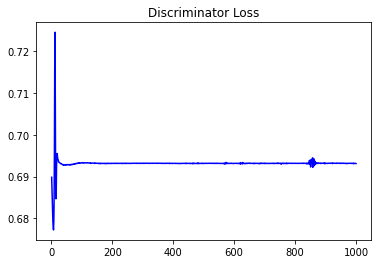

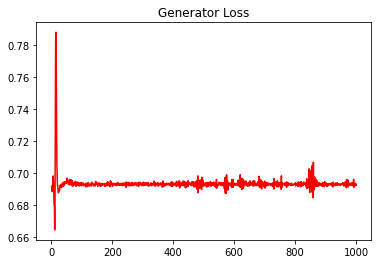

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.018166314687065855


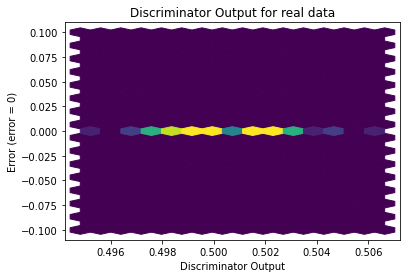

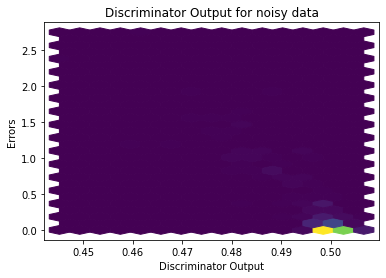

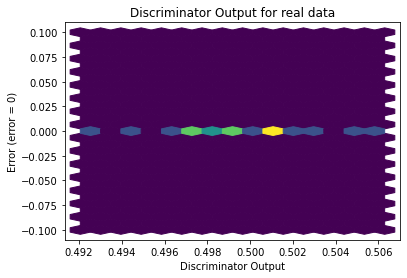

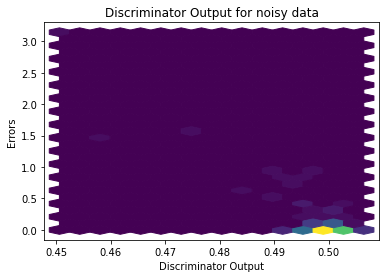

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


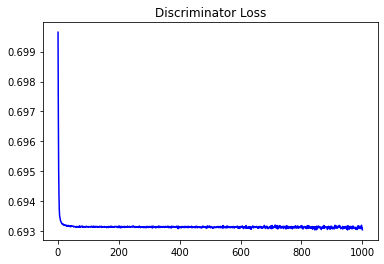

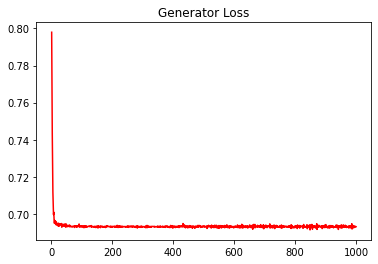

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.050729453600361935


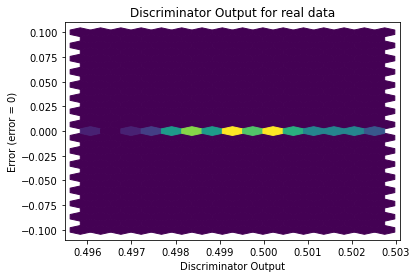

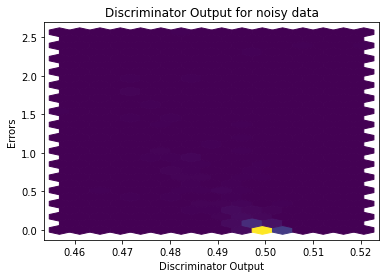

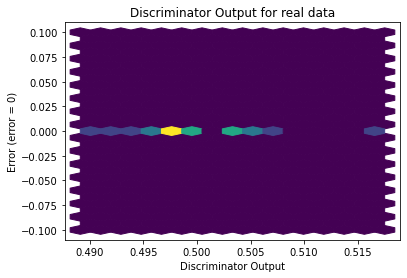

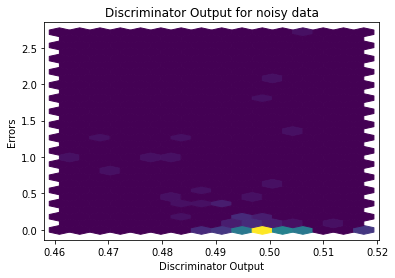

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
